IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

DATA AQISITION

In [8]:
dfins=pd.read_csv(r"C:\Users\91918\OneDrive\Desktop\ML datasets\insurance.csv")

In [9]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


MISSING VALUES-NaNs

dfins.isnull().sum()

In [10]:
dfins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


ERROR DETECTION

In [11]:
dfins["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [12]:
dfins["sex"].unique()

array(['female', 'male'], dtype=object)

In [13]:
dfins["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [14]:
dfins["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [15]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
dfins["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [17]:
dfins["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [18]:
dfins["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [19]:
dfins["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [20]:
dfins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

plottong boxplot to detect outliers

<Axes: >

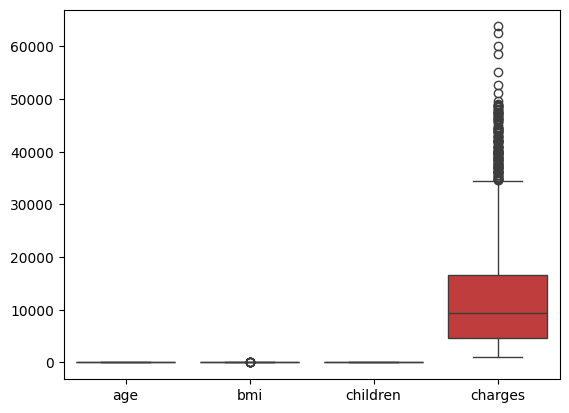

In [21]:
sns.boxplot(dfins)

<Axes: ylabel='bmi'>

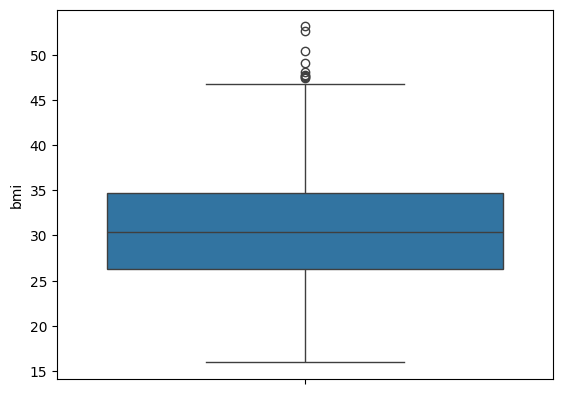

In [22]:
sns.boxplot(dfins["bmi"])

In [23]:
dfins["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [24]:
q1=dfins["bmi"].quantile(0.25)

In [25]:
q3=dfins["bmi"].quantile(0.75)

In [26]:
q1

np.float64(26.29625)

In [27]:
q3

np.float64(34.69375)

In [28]:
dfins["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [29]:
iqr=q3-q1

In [30]:
iqr

np.float64(8.3975)

In [31]:
lower=q1-(1.5*iqr)

In [32]:
upper=q3+(1.5*iqr)

In [33]:
lower

np.float64(13.7)

In [34]:
upper

np.float64(47.290000000000006)

In [35]:
dfins["bmi"]<lower

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [36]:
dfins[dfins["bmi"]<lower]

,age,sex,bmi,children,smoker,region,charges


In [37]:
dfins["bmi"]>upper

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [38]:
dfins[dfins["bmi"]>upper]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [39]:
dfins[(dfins["bmi"]<lower )|  (dfins["bmi"]>upper)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


CAPPING

In [40]:
dfins["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [41]:
dfins["bmi"].map(lambda x: lower if x<lower else upper if x>upper else x)

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [42]:
dfins["bmi"]=dfins["bmi"].map(lambda x: lower if x<lower else upper if x>upper else x)

<Axes: ylabel='bmi'>

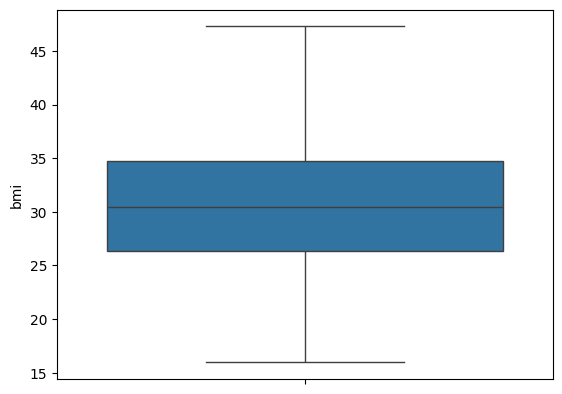

In [43]:
sns.boxplot(dfins["bmi"])

In [44]:
dfins["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<Axes: ylabel='charges'>

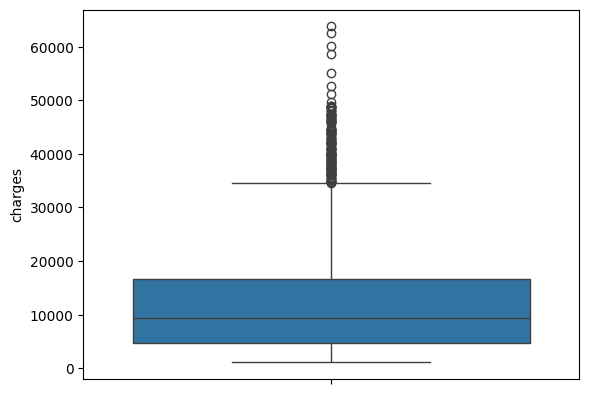

In [45]:
sns.boxplot(dfins["charges"])

In [46]:
q11=dfins["charges"].quantile(0.25)

In [47]:
q11

np.float64(4740.28715)

In [48]:
q33=dfins["charges"].quantile(0.75)

In [49]:
q33

np.float64(16639.912515)

In [50]:
iqr1=q33-q11

In [51]:
iqr1

np.float64(11899.625365)

In [52]:
lowerlimit=q11-(1.5*iqr1)

In [53]:
lowerlimit

np.float64(-13109.1508975)

In [54]:
upperlimit=q33+(1.5*iqr1)

In [55]:
upperlimit

np.float64(34489.350562499996)

In [56]:
dfins["charges"]<lowerlimit

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: charges, Length: 1338, dtype: bool

In [57]:
dfins["charges"]>upperlimit

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: charges, Length: 1338, dtype: bool

In [58]:
dfins[dfins["charges"]<lowerlimit]

,age,sex,bmi,children,smoker,region,charges


In [59]:
dfins[dfins["charges"]>upperlimit]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [60]:
dfins[(dfins["charges"]<lowerlimit)  | (dfins["charges"]>upperlimit)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


CAPPING

In [61]:
dfins["charges"]=dfins["charges"].map(lambda x: lowerlimit if x<lowerlimit else upperlimit if x>upperlimit else x)

<Axes: ylabel='charges'>

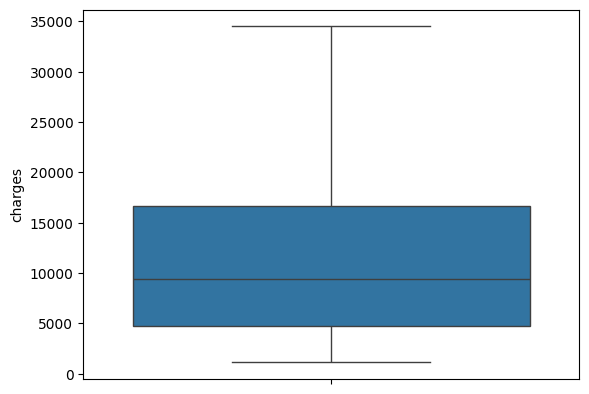

In [62]:
sns.boxplot(dfins["charges"])

ENCODING  OneHotEncoder

In [63]:
dfins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
dfins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [65]:
dfins["sex"].unique()

array(['female', 'male'], dtype=object)

In [66]:
dfins["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [67]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
ohe=OneHotEncoder(drop="first")

In [70]:
ohe

,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [71]:
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [72]:
dfins["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [73]:
dfins[["region"]]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [74]:
ohe.fit(dfins[["region"]])

,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [75]:
ohe.transform(dfins[["region"]])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1014 stored elements and shape (1338, 3)>

In [76]:
ohe.transform(dfins[["region"]]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(1338, 3))

In [77]:
ary=ohe.transform(dfins[["region"]]).toarray()

In [78]:
ary

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(1338, 3))

In [79]:
ohe.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [80]:
dfins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [81]:
dfins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
ary

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(1338, 3))

converting  ary into a DataFrame

In [83]:
pd.DataFrame(ary,dtype='int',columns=['region_southeast','region_northwest','region_northwest'])

,region_southeast,region_northwest,region_northwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [84]:
dfreg=pd.DataFrame(ary,dtype='int',columns=['region_southeast','region_northwest','region_northwest'])

In [85]:
dfreg

,region_southeast,region_northwest,region_northwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [86]:
pd.concat([dfreg,dfins],axis=1)

,region_southeast,region_northwest,region_northwest,age,sex,bmi,children,smoker,region,charges
0,0,0,1,19,female,27.900,0,yes,southwest,16884.92400
1,0,1,0,18,male,33.770,1,no,southeast,1725.55230
2,0,1,0,28,male,33.000,3,no,southeast,4449.46200
3,1,0,0,33,male,22.705,0,no,northwest,21984.47061
4,1,0,0,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,1,0,0,50,male,30.970,3,no,northwest,10600.54830
1334,0,0,0,18,female,31.920,0,no,northeast,2205.98080
1335,0,1,0,18,female,36.850,0,no,southeast,1629.83350
1336,0,0,1,21,female,25.800,0,no,southwest,2007.94500


In [87]:
dfins=pd.concat([dfins,dfreg],axis=1)

In [88]:
dfins

,age,sex,bmi,children,smoker,region,charges,region_southeast,region_northwest,region_northwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1


In [89]:
dfins.drop("region",axis=1,inplace=True)

In [90]:
dfins

,age,sex,bmi,children,smoker,charges,region_southeast,region_northwest,region_northwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,1


In [91]:
pd.get_dummies(dfins)

,age,bmi,children,charges,region_southeast,region_northwest,region_northwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,True,False,False,True
1,18,33.770,1,1725.55230,0,1,0,False,True,True,False
2,28,33.000,3,4449.46200,0,1,0,False,True,True,False
3,33,22.705,0,21984.47061,1,0,0,False,True,True,False
4,32,28.880,0,3866.85520,1,0,0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,False,True,True,False
1334,18,31.920,0,2205.98080,0,0,0,True,False,True,False
1335,18,36.850,0,1629.83350,0,1,0,True,False,True,False
1336,21,25.800,0,2007.94500,0,0,1,True,False,True,False


In [92]:
pd.get_dummies(dfins,drop_first=True)

,age,bmi,children,charges,region_southeast,region_northwest,region_northwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,False,True
1,18,33.770,1,1725.55230,0,1,0,True,False
2,28,33.000,3,4449.46200,0,1,0,True,False
3,33,22.705,0,21984.47061,1,0,0,True,False
4,32,28.880,0,3866.85520,1,0,0,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,True,False
1334,18,31.920,0,2205.98080,0,0,0,False,False
1335,18,36.850,0,1629.83350,0,1,0,False,False
1336,21,25.800,0,2007.94500,0,0,1,False,False


In [93]:
pd.get_dummies(dfins,drop_first=True).replace([True,False],[1,0])

,age,bmi,children,charges,region_southeast,region_northwest,region_northwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0
